<a href="https://colab.research.google.com/github/i1nourax/i1nourax/blob/main/Copy_of_Time_Series_Forecasting_Practical_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Forecasting Exam

In this exam, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in you can access it [here](https://www.kaggle.com/datasets/khaledzsa/traffic-dataset), the target is to predict `traffic_volume` column. There is also command to download the dataset below.

## Dataset: Traffic Dataset

### Dataset Overview:

- **Name**: Traffic Dataset
- **Description**: This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.
- **Time Period**: Starting from 18-11-2016
- **Frequency**: Hourly observations

### Features:

1. **temp:** a numeric variable that shows the average temperature in kelvin.
2. **rain_1h:** a numeric variable that shows the amount of rain in mm that occurred in the hour.
3. **snow_1h:** a numeric variable that shows the amount of snow in mm that occurred in the hour.
4. **clouds_all:** a numeric variable that shows the percentage of cloud cover.
5. **weather_main:** a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
6. **weather_description:** a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
7. **date_time:** a datetime variable that shows the hour of the data collected in local CST time.
8. **traffic_volume:** a numeric variable that shows the hourly I-94 reported westbound traffic volume.

#### Feel free to add or rearrange steps as you see fit to optimize your workflow. One additional note: the model's performance doesn't need to be 100% accurate. Instead, focus on achieving the best possible results while balancing performance and generalization.

## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [1]:
# Here is a helping code that will download and unzip the dataset for you.
# Once you download the dataset you may comment the code!
!kaggle datasets download -d khaledzsa/traffic-dataset
!unzip traffic-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/traffic-dataset
License(s): unknown
100% 235k/235k [00:00<00:00, 783kB/s]
100% 235k/235k [00:00<00:00, 782kB/s]
Archive:  traffic-dataset.zip
  inflating: Traffic Data.csv        


In [7]:
!pip install opendatasets

In [14]:
import pandas as pd

In [15]:
import opendatasets as od
dataset = 'https://www.kaggle.com/datasets/khaledzsa/traffic-dataset'
od.download(dataset)

Skipping, found downloaded files in "./traffic-dataset" (use force=True to force download)


In [17]:
df = pd.read_csv('/content/Traffic Data.csv')

## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use `seasonal_decompose` from the `statsmodels` library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

In [18]:
df

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00
...,...,...,...,...,...,...,...,...
19995,2723.0,296.42,0.0,0.0,40,Clouds,scattered clouds,2018-06-06 21:00:00
19996,5895.0,285.58,0.0,0.0,40,Clouds,scattered clouds,2017-10-25 15:00:00
19997,1132.0,275.30,0.0,0.0,1,Clear,sky is clear,2018-03-28 23:00:00
19998,5525.0,260.94,0.0,0.0,75,Clouds,broken clouds,2018-02-12 15:00:00


In [19]:
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       19980 non-null  float64
 1   temp                 20000 non-null  float64
 2   rain_1h              20000 non-null  float64
 3   snow_1h              20000 non-null  float64
 4   clouds_all           20000 non-null  int64  
 5   weather_main         20000 non-null  object 
 6   weather_description  20000 non-null  object 
 7   date_time            20000 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 1.2+ MB


In [21]:
df.describe()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all
count,19980.000000,20000.000000,20000.000000,20000.0,20000.000000
mean,3278.186887,281.162680,0.048396,0.0,49.384600
std,1977.171357,12.661288,0.398007,0.0,39.647341
min,113.000000,243.390000,0.000000,0.0,0.000000
25%,1228.750000,271.950000,0.000000,0.0,1.000000
50%,3430.000000,281.825000,0.000000,0.0,75.000000
75%,4928.000000,291.840000,0.000000,0.0,90.000000
max,16781.000000,310.070000,10.600000,0.0,92.000000


In [22]:
df.isnull().sum()

,0
traffic_volume,20
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
date_time,0


In [23]:
df.columns

Index(['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all',
       'weather_main', 'weather_description', 'date_time'],
      dtype='object')

In [24]:
df.dtypes

,0
traffic_volume,float64
temp,float64
rain_1h,float64
snow_1h,float64
clouds_all,int64
weather_main,object
weather_description,object
date_time,object


In [25]:
df.shape

(20000, 8)

In [42]:
df.nunique()

,0
traffic_volume,5754
temp,3900
rain_1h,87
snow_1h,1
clouds_all,21
weather_main,10
weather_description,34
date_time,16257


## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

In [26]:
df.isnull().sum()

,0
traffic_volume,20
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
date_time,0


In [29]:
missing_values = df.isnull().sum()
print(missing_values)

traffic_volume         20
temp                    0
rain_1h                 0
snow_1h                 0
clouds_all              0
weather_main            0
weather_description     0
date_time               0
dtype: int64


In [30]:
df.dropna(inplace=True)

In [33]:
df.isnull().sum()

,0
traffic_volume,0
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
date_time,0


In [34]:
df.index = pd.to_datetime(df['date_time'])

In [35]:
df.index

DatetimeIndex(['2017-08-27 01:00:00', '2018-09-06 23:00:00',
               '2017-08-25 18:00:00', '2017-11-09 22:00:00',
               '2017-11-09 15:00:00', '2018-06-09 12:00:00',
               '2018-07-26 19:00:00', '2018-08-03 15:00:00',
               '2018-01-10 20:00:00', '2018-08-09 00:00:00',
               ...
               '2017-09-05 05:00:00', '2018-04-06 11:00:00',
               '2018-08-03 23:00:00', '2017-08-10 02:00:00',
               '2017-03-21 07:00:00', '2018-06-06 21:00:00',
               '2017-10-25 15:00:00', '2018-03-28 23:00:00',
               '2018-02-12 15:00:00', '2018-05-31 18:00:00'],
              dtype='datetime64[ns]', name='date_time', length=19980, freq=None)

In [36]:
import datetime as dt

In [41]:
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
date_time,,,,,,,,
2017-08-27 01:00:00,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00
2018-09-06 23:00:00,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00
2017-08-25 18:00:00,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00
2017-11-09 22:00:00,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00
2017-11-09 15:00:00,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00


In [99]:
df['date_time'] = pd.to_datetime(df['date_time'])

df['day_of_week'] = df['date_time'].dt.dayofweek
df['month'] = df['date_time'].dt.month
df['day_of_year'] = df['date_time'].dt.dayofyear

## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `prev_traffic_volume`, which represents the previous day's traffic volume.

- **Difference between traffic_volume**: Calculate the difference between the values in `traffic_volume` column to highlight short-term volume.

- **Date Features**: Extract meaningful time-based features from the `date_time` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.


In [47]:
df['prev_traffic_volume'] = df['traffic_volume'].shift(1)

In [48]:
df['diff_traffic_volume'] = df['traffic_volume'].diff()

In [49]:
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,prev_traffic_volume,diff_traffic_volume
date_time,,,,,,,,,,
2017-08-27 01:00:00,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00,NaN,NaN
2018-09-06 23:00:00,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00,1209.0,39.0
2017-08-25 18:00:00,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00,1248.0,3354.0
2017-11-09 22:00:00,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00,4602.0,-1764.0
2017-11-09 15:00:00,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00,2838.0,2956.0


In [50]:
df.date_time = pd.to_datetime(df.date_time)

In [51]:
df['day_of_week'] = df['date_time'].dt.dayofweek
df['month'] = df['date_time'].dt.month
df['day_of_year'] = df['date_time'].dt.dayofyear

In [54]:
print(df.head())

                     traffic_volume    temp  rain_1h  snow_1h  clouds_all  \
date_time                                                                   
2017-08-27 01:00:00          1209.0  291.15      0.0      0.0          90   
2018-09-06 23:00:00          1248.0  286.01      0.0      0.0           1   
2017-08-25 18:00:00          4602.0  293.69      0.0      0.0          75   
2017-11-09 22:00:00          2838.0  262.35      0.0      0.0           1   
2017-11-09 15:00:00          5794.0  267.08      0.0      0.0           5   

                    weather_main weather_description           date_time  \
date_time                                                                  
2017-08-27 01:00:00         Mist                mist 2017-08-27 01:00:00   
2018-09-06 23:00:00        Clear        sky is clear 2018-09-06 23:00:00   
2017-08-25 18:00:00       Clouds       broken clouds 2017-08-25 18:00:00   
2017-11-09 22:00:00        Clear        sky is clear 2017-11-09 22:00:00   
2017

array([[<Axes: title={'center': 'traffic_volume'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'rain_1h'}>],
       [<Axes: title={'center': 'snow_1h'}>,
        <Axes: title={'center': 'clouds_all'}>,
        <Axes: title={'center': 'date_time'}>],
       [<Axes: title={'center': 'prev_traffic_volume'}>,
        <Axes: title={'center': 'diff_traffic_volume'}>,
        <Axes: title={'center': 'day_of_week'}>],
       [<Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'day_of_year'}>, <Axes: >]], dtype=object)

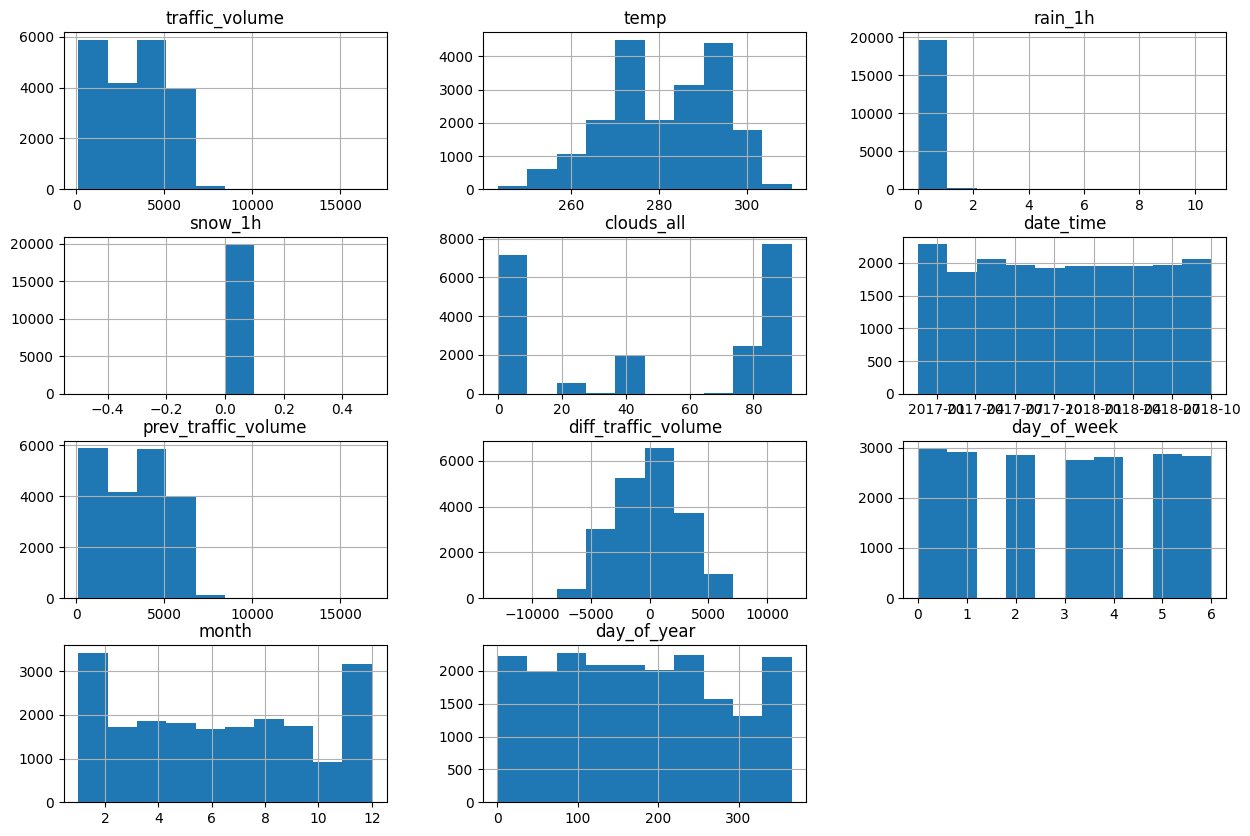

In [55]:
df.hist(figsize=(15, 10))

In [200]:
encoder = OneHotEncoder(sparse=False)

In [201]:
encoder.fit_transform(df[['weather_main']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [202]:
features = encoder.fit_transform(df[['weather_main']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [203]:
target = df['traffic_volume']

In [204]:
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()
feature_scaler.fit_transform(features)
target_scaler.fit_transform(target.values.reshape(-1, 1))

array([[0.06575474],
       [0.06809455],
       [0.26931845],
       ...,
       [0.06113511],
       [0.32469402],
       [0.29571634]])

In [205]:
target_scaler = MinMaxScaler()
scaled_target = target_scaler.fit_transform(target.values.reshape(-1, 1))

## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [207]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [208]:
# Prepare sequences
def create_sequences(features, target, n_past):
    X, y = [], []
    for i in range(n_past, len(features)):
        X.append(features[i - n_past:i])
        y.append(target[i])
    return np.array(X), np.array(y)

In [209]:
# Create X and y here
n_past = 60
X, y = create_sequences(df.drop('traffic_volume', axis=1).values, df['traffic_volume'].values, n_past)

## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [217]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [218]:
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

In [219]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [220]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [221]:
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

In [222]:
X

array([[[291.15, 0.0, 0.0, ..., 6, 8, 239],
        [286.01, 0.0, 0.0, ..., 3, 9, 249],
        [293.69, 0.0, 0.0, ..., 4, 8, 237],
        ...,
        [291.44, 0.0, 0.0, ..., 5, 6, 160],
        [277.08, 0.0, 0.0, ..., 1, 11, 318],
        [294.08, 0.0, 0.0, ..., 5, 8, 216]],

       [[286.01, 0.0, 0.0, ..., 3, 9, 249],
        [293.69, 0.0, 0.0, ..., 4, 8, 237],
        [262.35, 0.0, 0.0, ..., 3, 11, 313],
        ...,
        [277.08, 0.0, 0.0, ..., 1, 11, 318],
        [294.08, 0.0, 0.0, ..., 5, 8, 216],
        [273.72, 0.0, 0.0, ..., 4, 11, 307]],

       [[293.69, 0.0, 0.0, ..., 4, 8, 237],
        [262.35, 0.0, 0.0, ..., 3, 11, 313],
        [267.08, 0.0, 0.0, ..., 3, 11, 313],
        ...,
        [294.08, 0.0, 0.0, ..., 5, 8, 216],
        [273.72, 0.0, 0.0, ..., 4, 11, 307],
        [270.02, 0.0, 0.0, ..., 3, 1, 25]],

       ...,

       [[288.21, 0.0, 0.0, ..., 1, 4, 114],
        [289.16, 0.0, 0.0, ..., 5, 10, 294],
        [285.422, 0.0, 0.0, ..., 0, 2, 51],
        ...

In [223]:
X.shape

(19920, 60, 12)

In [224]:
#Traffic volume target
target = df['traffic_volume'].values

## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

In [225]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

In [229]:
# Define model architecture
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], X.shape[2]))) # Now X is defined
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_55 (LSTM)                       │ (None, 60, 50)              │          12,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_54 (Dropout)                 │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_56 (LSTM)                       │ (None, 60, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_55 (Dropout)                 │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_57 (LSTM)                       │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_56 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 53,051 (207.23 KB)

 Trainable params: 53,051 (207.23 KB)

 Non-trainable params: 0 (0.00 B)

In [233]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Dummy data (replace with your actual data)
X = np.random.rand(100, 60, 10)  # Example shape: (samples, timesteps, features)
y = np.random.rand(100, 1)       # Example shape: (samples, output dimension)

# Ensure correct data types
X = X.astype('float32')
y = y.astype('float32')

# Define the model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 270ms/step - loss: 0.2544 - val_loss: 0.0863
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.1089 - val_loss: 0.1270
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 0.1566 - val_loss: 0.0894
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.1074 - val_loss: 0.0886
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.1089 - val_loss: 0.0933
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.1123 - val_loss: 0.0923
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.1003 - val_loss: 0.0877
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.1023 - val_loss: 0.0868
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0961 - val_loss: 0.0874
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.1006 - val_loss: 0.0866


### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [236]:
# Predict on the test set (split data accordingly)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [237]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Calculate performance metrics
train_mae = mean_absolute_error(y_train, train_predict)
train_rmse = np.sqrt(mean_squared_error(y_train, train_predict))
test_mae = mean_absolute_error(y_test, test_predict)
test_rmse = np.sqrt(mean_squared_error(y_test, test_predict))
test_r2 = r2_score(y_test, test_predict)

print(f'Training MAE: {train_mae:.2f}')
print(f'Training RMSE: {train_rmse:.2f}')
print(f'Test MAE: {test_mae:.2f}')
print(f'Test RMSE: {test_rmse:.2f}')
print(f'Test R-squared: {test_r2:.2f}')

Training MAE: 0.28
Training RMSE: 0.30
Test MAE: 0.27
Test RMSE: 0.29
Test R-squared: 0.01


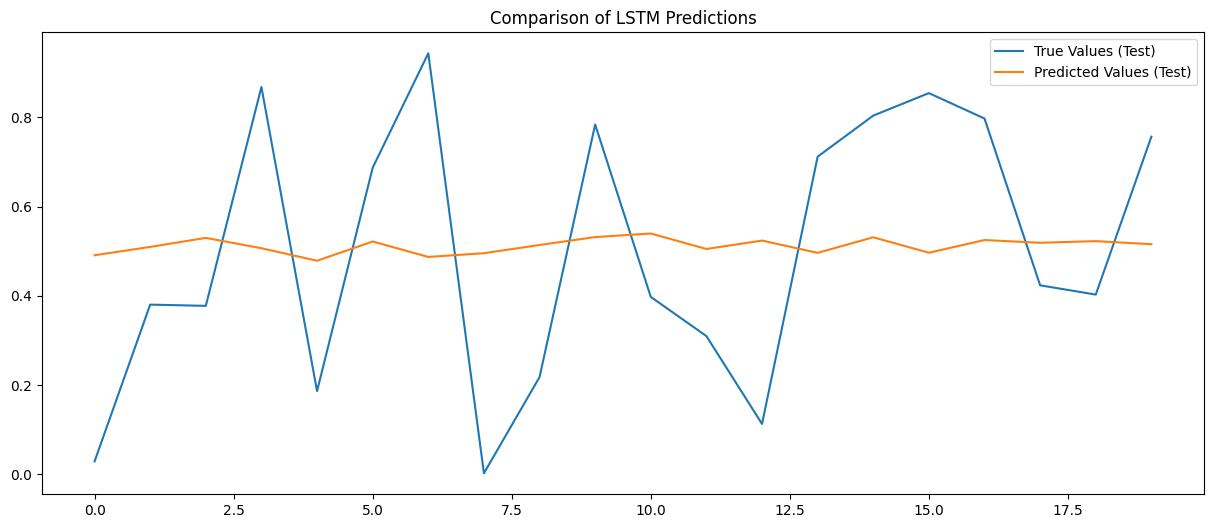

In [248]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.plot(y_test, label='True Values (Test)')
plt.plot(test_predict, label='Predicted Values (Test)')
plt.legend()
plt.title('Comparison of LSTM Predictions')
plt.show()

### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

In [240]:
from tensorflow.keras.layers import SimpleRNN

rnn_model = Sequential()
rnn_model.add(SimpleRNN(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
rnn_model.add(SimpleRNN(50, return_sequences=False))
rnn_model.add(Dense(1))

rnn_model.compile(optimizer='adam', loss='mean_squared_error')

rnn_history = rnn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 740ms/step - loss: 1.6343 - val_loss: 0.4858
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - loss: 0.4813 - val_loss: 0.2449
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - loss: 0.4407 - val_loss: 0.2196
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 0.3739 - val_loss: 0.1296
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.1935 - val_loss: 0.1754
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.2006 - val_loss: 0.2512
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.2473 - val_loss: 0.2094
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.1987 - val_loss: 0.1314
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.1399 - val_loss: 0.1042
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.1151 - val_loss: 0.1133
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.1454 - val_loss: 0.1082
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.1273 - val_loss: 0.10

### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [242]:
# Predict on the test set (split data accordingly)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [244]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


rnn_train_mae = mean_absolute_error(y_train, rnn_train_predict)
rnn_train_rmse = np.sqrt(mean_squared_error(y_train, rnn_train_predict))
rnn_test_mae = mean_absolute_error(y_test, rnn_test_predict)
rnn_test_rmse = np.sqrt(mean_squared_error(y_test, rnn_test_predict))
rnn_test_r2 = r2_score(y_test, rnn_test_predict)

print(f'RNN Training MAE: {rnn_train_mae:.2f}')
print(f'RNN Training RMSE: {rnn_train_rmse:.2f}')
print(f'RNN Test MAE: {rnn_test_mae:.2f}')
print(f'RNN Test RMSE: {rnn_test_rmse:.2f}')
print(f'RNN Test R-squared: {rnn_test_r2:.2f}')

RNN Training MAE: 0.10
RNN Training RMSE: 0.18
RNN Test MAE: 0.42
RNN Test RMSE: 0.48
RNN Test R-squared: -1.67


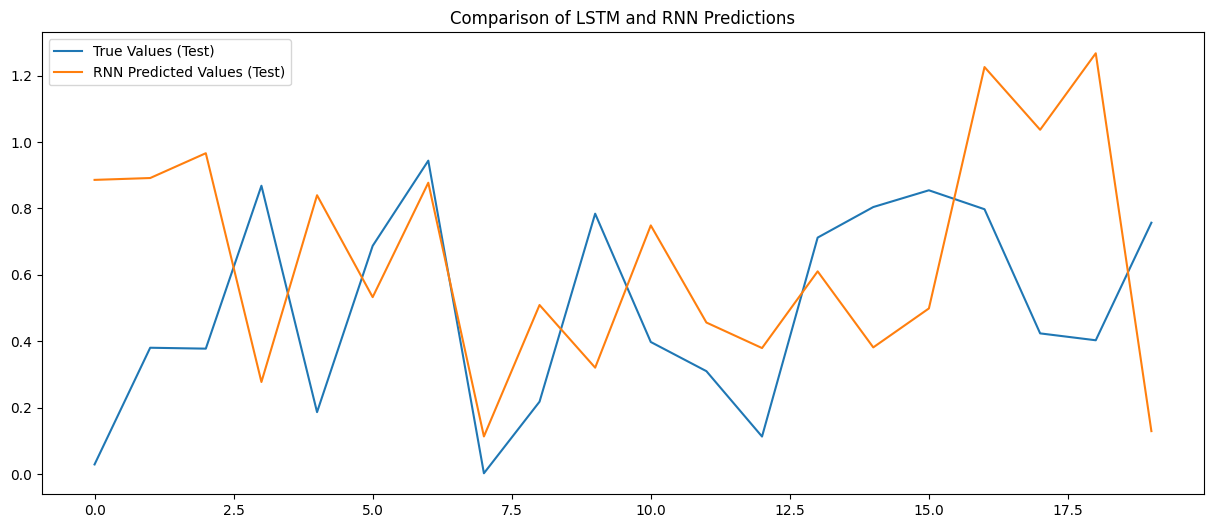

In [246]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.plot(y_test, label='True Values (Test)')
plt.plot(rnn_test_predict, label='RNN Predicted Values (Test)')
plt.legend()
plt.title('Comparison of LSTM and RNN Predictions')
plt.show()

## Project Questions:

1. **Data Preprocessing**: Explain How you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?
2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.
3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?
4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?
6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
7. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here: